# Stock Market Prediction Using Stacked LSTM :    

# Author: Rajesh Balouda

# LETS GROW MORE

# Data Science Intern May 2022

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing dataset from  url
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)
print('dataset imported')

dataset imported


# Preparing the data

In [4]:
#taking care of missing values
if df.isnull().values.any():
    print('there is missing values')
else:
    print('There is no null value')


There is no null value


In [5]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
# since date is in decreasing order so we adjust our dataframe with respect increasing order
df  =df.loc[::-1]

In [7]:
# reset index of dataframe
df = df.reset_index()

In [16]:
#drop previous index column
df.drop('index',inplace=True,axis=1)

## we can take any column of our dataset for forecasting 
## we take Close column for forecasting

In [8]:
#taking close column for forecasting
dfc =df.Close

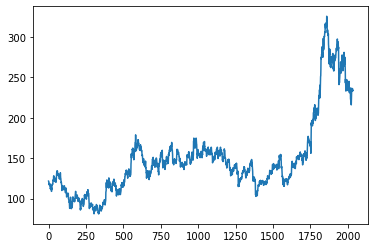

In [10]:
# plot our close column values by matplotlib
plt.plot(dfc)
plt.show()

## Since in Lstm we required Standardized Feature
## so here we use MinMax Scaler

In [11]:
#importing MinMaxScaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [12]:
#standardization of our feature column and change into array
sd = MinMaxScaler(feature_range=(0,1))
dfc = sd.fit_transform(np.array(dfc).reshape(-1,1))

In [14]:
dfc

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## split dataset into the traininng set and test set



## since in Stacked Lstm we requires sequential so we split our dataset in this manner that first 70% dataset  we use for training and last 30% data we use for test

In [16]:
#define train_size and test size
train_size = int(round(len(dfc)*0.70,0))
test_size = int(round(len(dfc)-train_size,0))

In [19]:
#split datset into training set and test set
train_data,test_data=dfc[0:train_size,:],dfc[test_size:len(dfc),:1]

In [20]:
train_data,test_data

(array([[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.15012255],
        [0.15747549],
        [0.15277778]]),
 array([[0.3247549 ],
        [0.32271242],
        [0.32618464],
        ...,
        [0.62622549],
        [0.62214052],
        [0.62418301]]))

## in stacked Lstm we have to define timestep that how many sequential value we want to predict future value of stock

In [21]:
# define function to create feature and dependent dataset
def create_dataset(dataset,timestep=1):
    data_x,data_y=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:i+timestep,0]
        data_x.append(a)
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)     
        

In [22]:
#create dataset of dependent and independent variable we take timestep is equal 150 
timestep = 150
x_train,y_train = create_dataset(train_data,timestep)
x_test,y_test = create_dataset(test_data,timestep)

In [23]:
#reshape features for training the model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# Create the Stacked Lstm Model

In [27]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### install tensorflow

In [28]:
pip install tensorflow

In [29]:
#import tensorflow
import tensorflow as tf

In [30]:
# import module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Create a Lstm Model with one input layer and two hidden layer and one output layer we use optimizer adam 

In [32]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Training the Model

In [33]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 14s 415ms/step - loss: 0.0128 - val_loss: 0.0164
Epoch 2/100
20/20 [==============================] - 6s 279ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 3/100
20/20 [==============================] - 7s 331ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 4/100
20/20 [==============================] - 6s 325ms/step - loss: 8.6031e-04 - val_loss: 0.0019
Epoch 5/100
20/20 [==============================] - 6s 324ms/step - loss: 8.4764e-04 - val_loss: 0.0017
Epoch 6/100
20/20 [==============================] - 7s 335ms/step - loss: 8.1323e-04 - val_loss: 0.0018
Epoch 7/100
20/20 [==============================] - 6s 327ms/step - loss: 7.6597e-04 - val_loss: 0.0016
Epoch 8/100
20/20 [==============================] - 6s 315ms/step - loss: 7.4713e-04 - val_loss: 0.0017
Epoch 9/100
20/20 [==============================] - 6s 300ms/step - loss: 7.3686e-04 - val_loss: 0.0017
Epoch 10/100
20/20 [==============================] - 6s 326ms/ste

20/20 [==============================] - 5s 234ms/step - loss: 1.5606e-04 - val_loss: 7.2330e-04
Epoch 78/100
20/20 [==============================] - 6s 303ms/step - loss: 1.7310e-04 - val_loss: 8.4706e-04
Epoch 79/100
20/20 [==============================] - 6s 301ms/step - loss: 1.7017e-04 - val_loss: 3.9528e-04
Epoch 80/100
20/20 [==============================] - 5s 278ms/step - loss: 1.8732e-04 - val_loss: 6.1413e-04
Epoch 81/100
20/20 [==============================] - 40s 2s/step - loss: 1.6166e-04 - val_loss: 8.3317e-04
Epoch 82/100
20/20 [==============================] - 6s 307ms/step - loss: 1.6253e-04 - val_loss: 4.8702e-04
Epoch 83/100
20/20 [==============================] - 6s 319ms/step - loss: 1.5104e-04 - val_loss: 5.3637e-04
Epoch 84/100
20/20 [==============================] - 6s 325ms/step - loss: 1.6946e-04 - val_loss: 5.9104e-04
Epoch 85/100
20/20 [==============================] - 6s 288ms/step - loss: 1.5513e-04 - val_loss: 9.2015e-04
Epoch 86/100
20/20 [=====

# Predicting the results

In [34]:
#predict on transform data
train_predict  =model.predict(x_train)
test_predict = model.predict(x_test)


40/40 [==============================] - 2s 55ms/step


In [35]:
# predict on original data
train_predict  =sd.inverse_transform(train_predict)
test_predict = sd.inverse_transform(test_predict)

# Evaluate the Model

In [36]:
#calculate rmse matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

136.30008638095413

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))

174.2177361695035

# Thank You